In [1]:
% pylab inline
from scipy.io import wavfile 
import numpy as np
import scipy
from scipy import interpolate
import matplotlib


Populating the interactive namespace from numpy and matplotlib


In [2]:
# Se importa el archivo
ring=np.genfromtxt("ring.dft", dtype('complex'))
# Se le aplica la transformada inversa
ringt=numpy.fft.ifft(ring)
# Se saca el valor absoluto 
ringn=abs(ringt)
# Se verifica que los valores sean reales
print ringn

[  2.00000000e+00   1.00000000e+00   1.00000000e+00 ...,   1.00000000e+00
   2.20486946e-10   2.61657451e-10]


In [3]:
ringf=np.int16(ringt)
wavfile.write("ring.wav",22050,ringf)
x=linspace(0,len(ringf),len(ringf))
f=linspace(0,len(x),2*len(x))
print len(f)

248790


/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


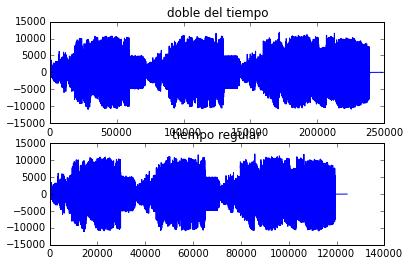

In [4]:
inter=interpolate.interp1d(x,ringf,kind='linear')
g=2*f
doble=inter(f)
doble=np.int16(doble)
subplot(211)
title('doble del tiempo')
plot(g,doble)
subplot(212)
title('tiempo regular')
plot(x,ringf)
plt.show()

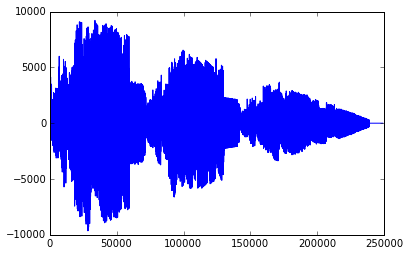

In [5]:
rampvol=linspace(1,0,len(doble))
ringRampa=rampvol*doble
ringRampa=np.int16(ringRampa)
plot(g,rampvol*doble)
wavfile.write("ringx2.wav",22050,doble)
wavfile.write("ringx2RampVol.wav",22050,ringRampa)